In [1]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 100000000
import glob
import os
import numpy as np
from tqdm import tqdm

In [2]:
train_img_dir = '/Users/koheihenmi/Dropbox/signate/tellus/data/train_images/'
train_anno_dir = '/Users/koheihenmi/Dropbox/signate/tellus/data/train_annotations/'
train_img_pathes = sorted(glob.glob(train_img_dir+'*'))
train_anno_pathes = sorted(glob.glob(train_anno_dir+'*'))
train_img_hh_pathes = train_img_pathes[:80]
train_img_hv_pathes = train_img_pathes[80:]

In [3]:
"""
        0：海氷密度 0（海氷なし）
        1：海氷密度 1-3
        4：海氷密度 4-6
        7：海氷密度 7-8
        9：海氷密度 9-10
        11：湖
        12：陸域
"""
class_box = {"0":[[0 for _ in range(256)] for _ in range(256)],
             "1":[[0 for _ in range(256)] for _ in range(256)],
             "4":[[0 for _ in range(256)] for _ in range(256)],
             "7":[[0 for _ in range(256)] for _ in range(256)],
             "9":[[0 for _ in range(256)] for _ in range(256)],
             "11":[[0 for _ in range(256)] for _ in range(256)],
             "12":[[0 for _ in range(256)] for _ in range(256)]}


'\n        0：海氷密度 0（海氷なし）\n        1：海氷密度 1-3\n        4：海氷密度 4-6\n        7：海氷密度 7-8\n        9：海氷密度 9-10\n        11：湖\n        12：陸域\n'

In [4]:
for hh_path, hv_path, anno_path in tqdm(zip(train_img_hh_pathes,train_img_hv_pathes,train_anno_pathes),total=len(train_anno_pathes)):
    hh = np.array(Image.open(hh_path))
    hv = np.array(Image.open(hv_path))
    anno = np.array(Image.open(anno_path))
    for i,row in enumerate(anno):
        for j,coloum in enumerate(row):
            class_box[str(anno[i][j])][hh[i][j]][hv[i][j]] += 1 
    

100%|██████████| 80/80 [2:38:54<00:00, 119.18s/it]  


In [12]:
import csv
output_dir = '/Users/koheihenmi/Dropbox/signate/tellus/output/'
for label_name,label_value in class_box.items():
    """
    中間ファイル保存
    """
    
    with open(output_dir+'analyze_label__'+label_name+'.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerows(label_value)
    
    print('name',label_name)
    print('sum',np.sum(label_value))
    print('max',np.max(label_value),'argmax',np.argmax(label_value)//255,np.argmax(label_value)%255)
    print('min',np.min(label_value),'argmin',np.argmin(label_value)//255,np.argmin(label_value)%255)
    
        

name 0
sum 3686976667
max 468501928 argmax 2 3
min 0 argmin 0 9
name 1
sum 495585015
max 70069628 argmax 2 3
min 0 argmin 0 7
name 4
sum 531557261
max 42930976 argmax 3 4
min 0 argmin 0 6
name 7
sum 322298627
max 19456653 argmax 7 9
min 0 argmin 0 6
name 9
sum 469473926
max 20496113 argmax 5 7
min 0 argmin 0 6
name 11
sum 2959648
max 286517 argmax 3 5
min 0 argmin 0 7
name 12
sum 337384407
max 4380141 argmax 13 20
min 0 argmin 0 12


In [28]:
import matplotlib.pyplot as plt
def draw_heatmap(data, min_value, max_value):
    """
    :param data:二次元配列．入力するデータ
    :param min_value:カラーバーの最小値
    :param max_value:カラーバーの最大値
    """
    # 描画する
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues, vmin=min_value, vmax=max_value)
    #ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    #ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    plt.show()

0


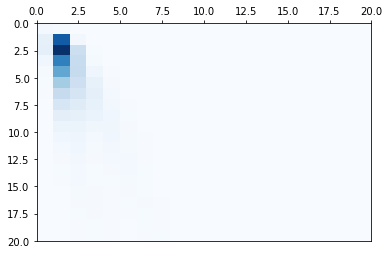

1


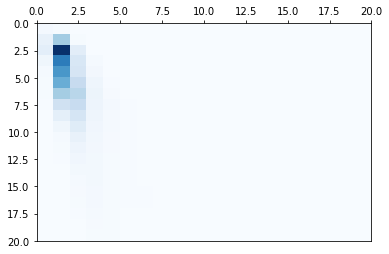

4


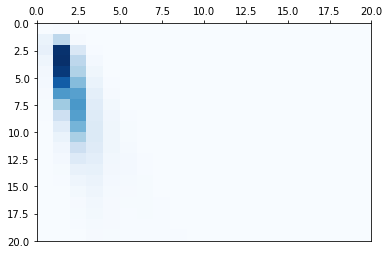

7


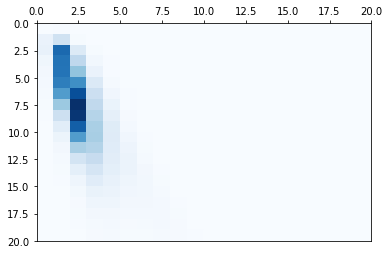

9


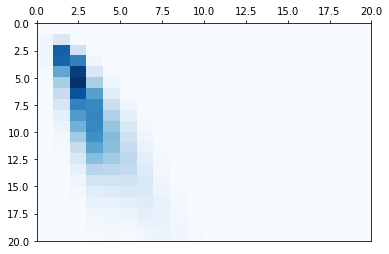

11


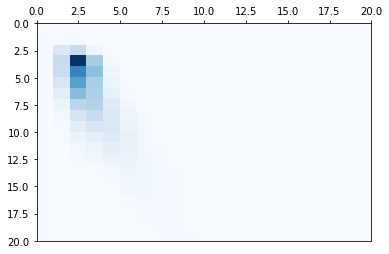

12


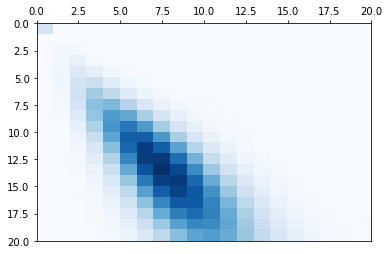

In [33]:
for label_name,label_value in class_box.items():
    label_value = np.array(label_value)[:20,:20]
    print(label_name)
    draw_heatmap(label_value,np.min(label_value),np.max(label_value))